In [ ]:
%----------------------------------------------------------------------
%General dynamic landscapes
%Melian@KB May 2017
%Palamara&Melian June 2017 version from scratch
%----------------------------------------------------------------------
for ri = 1:50;
    S = 20;J = 100;%S sites and J inds. per site
    
    %1. Implement a general case with zero-sum dynamics 
    %combining static-dynamic vs. symmetric-asymmetric scenarios (non-stationary Gillespie later)
    %Be sure that the mij + lambda + nu == 1
    %----------------------------------------------------------- 
    R = ones(S,J);
    countgen = 0;
    Pairs = zeros(1,2);cevents = 0;
for k = 1:100;
        A = 100;%amplitude, is the peak deviation: 
        %350 to match simulations in random landscapes
        f = 0.1;%ordinary frequency, number of 
        %cycles that occur each second of time
        sig = 0;%the phase
        countgen = countgen + 1;
        r = A*sin(2*pi*f*countgen + sig) + A;%starting point with r approx.
        
        %2. Check sinusoidal with boundary conditions considering continuous A and f
        %Check r_min == 0 and r_max == max distance ij
               
        D = zeros(S,S);%theshold matrix
        Di = zeros(S,S);%distance matrix
        mu = S*(exp((-pi * (r/1000)^2 * S)));%site connectivity
        n = unifrnd(0,1000,S,2);

        for i = 1:S-1;
            for j = i+1:S;
                A = (n(i,1) - n(j,1))^2;%Euclidean distance
                B = (n(i,2) - n(j,2))^2;
                d(i,j) = sqrt(A + B);
                Di(i,j) = 1/d(i,j);
                
                %3. This is the simplest kernel
                %Explore the asymmetry under 1/d(i,j)
                %Do we need to implement more asymmetric situations, like 1/(d(i,j)^x) with x > 1;
                
                if d(i,j) < r;%threshold
                   D(i,j) = 1;
                else
                   D(i,j) = 0;
                end
           end
        end
        DI=Di+Di';Dc=cumsum(DI,2);D1=D+D';
        
        for j = 1:J*S;
            KillHab = unidrnd(S);
            KillInd = unidrnd(J);
            MigrantHab = unifrnd(0,max(Dc(KillHab,:)));
            Hab = find(Dc(KillHab,:) >= MigrantHab);
            %pause
            if D1(KillHab,Hab(1,1)) == 1;
               
               %4. Implement local birth dynamics and speciation dynamics
               
               MigrantInd = unidrnd(J);
               cevents = cevents + 1;
               Pairs(cevents,1) = KillHab;
               Pairs(cevents,2) = Hab(1,1);                 
              break
            end
       
        end
 end
end                      
fid = fopen('Asymmetry.txt','a');fprintf(fid, 
[repmat('% 6f',1,size(Pairs,2)), '\n'],Pairs);fclose(fid); 

In [11]:
A = dlmread('Asymmetry.txt');

In [12]:
size(A)

ans =

   370     2



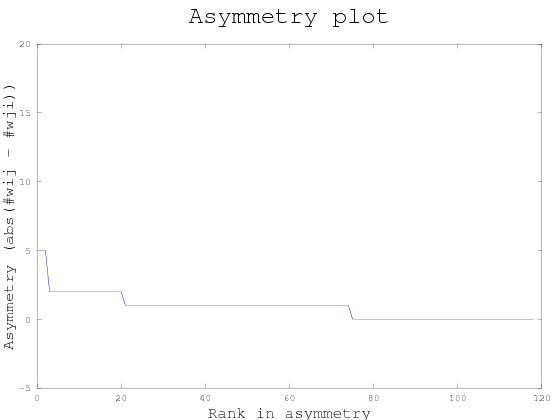

In [18]:
%------------------------------------------------------------
%Compute asymmetry in migration events between site i and j
%Melian@KB May 2017
%------------------------------------------------------------
A = dlmread('Asymmetry.txt');
B = unique(A,'rows');
[tf1, idx] = ismember(A,B,'rows');            
y = accumarray(idx(:),1);
count = 0;
for i = 1:length(B);
    if B(i,1) ~= B(i,2);
    i;
       wij = find(B(:,1) == B(i,1) & B(:,2) == B(i,2));
       wji = find(B(:,1) == B(i,2) & B(:,2) == B(i,1));
       B(wij,:);
       B(wji,:);
       if ~isempty(B(wji,:)); 
       count = count + 1;
       ASY(count,1) = abs(y(wij,:) - y(wji,:));
       end
    end
end
Q = sort(ASY,'descend');
V = 1:length(Q);
plot(V,Q,"markersize",36)
xlabel ("Rank in asymmetry","fontsize",16);
ylabel ("Asymmetry (abs(#wij - #wji))","fontsize",16);
title ("Asymmetry plot","fontsize",24);
axis([0 120 -5 20])

In [ ]:
Asymmetry plot accounting for connectance and Euclidean distance 
for A = 100 and f = 0.1 -- Most pairwise sites have asymmetry 
close to zero (approx 75%) -- explore broader space of A and f, 
is asymmetry low across all the parameter space? 
Model a scenario with higher asymmetry -- which one?